In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("MNIST_data/")
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels
  


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# Network Parameters
h_in, w_in = 28, 28  # Image size height and width
k = 3   # Kernel size
p = 2 # pool
s = 2 # Strides in maxpool
filters = {1:32,2:32,3:16}
activation_fn=tf.nn.relu
# Change in dimensions of image after each MaxPool
h_l2, w_l2 = int(np.ceil(float(h_in)/float(s))) , int(np.ceil(float(w_in)/float(s)))   # Height and width: second encoder/decoder layer
h_l3, w_l3 = int(np.ceil(float(h_l2)/float(s))) , int(np.ceil(float(w_l2)/float(s)))   # Height and width: third encoder/decoder layer

   

In [4]:
X_noisy = tf.placeholder(tf.float32, (None, h_in, w_in, 1), name='inputs')
X = tf.placeholder(tf.float32, (None, h_in, w_in, 1), name='targets')

-

In [5]:
sess = tf.Session()

In [6]:
epochs = 10
batch_size = 100
# Set's how much noise we're adding to the MNIST images
noise_factor = 0.5
sess.run(tf.global_variables_initializer())
err = []
for i in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        # Get images from the batch
        imgs = batch[0].reshape((-1, h_in, w_in, 1))
        
        # Add random noise to the input images
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # Noisy images as inputs, original images as targets
        batch_cost, _ = sess.run([cost, opt], feed_dict={X_noisy: noisy_imgs,X: imgs})
        err.append(batch_cost)
        if ii%100 == 0:
            print("Epoch: {0}/{1}...  Training loss {2}".format(i, epochs, batch_cost))

Epoch: 0/10...  Training loss 0.6888405084609985
Epoch: 0/10...  Training loss 0.21820376813411713
Epoch: 0/10...  Training loss 0.18392638862133026
Epoch: 0/10...  Training loss 0.17025244235992432
Epoch: 0/10...  Training loss 0.16260577738285065
Epoch: 0/10...  Training loss 0.14627832174301147
Epoch: 1/10...  Training loss 0.1571062058210373
Epoch: 1/10...  Training loss 0.14689472317695618
Epoch: 1/10...  Training loss 0.14627325534820557
Epoch: 1/10...  Training loss 0.14121900498867035
Epoch: 1/10...  Training loss 0.1406722515821457
Epoch: 1/10...  Training loss 0.14484477043151855
Epoch: 2/10...  Training loss 0.13390854001045227
Epoch: 2/10...  Training loss 0.1319851279258728
Epoch: 2/10...  Training loss 0.12598344683647156
Epoch: 2/10...  Training loss 0.12923564016819
Epoch: 2/10...  Training loss 0.12308519333600998
Epoch: 2/10...  Training loss 0.13089706003665924
Epoch: 3/10...  Training loss 0.1229218989610672
Epoch: 3/10...  Training loss 0.11351560056209564
Epoch: 3

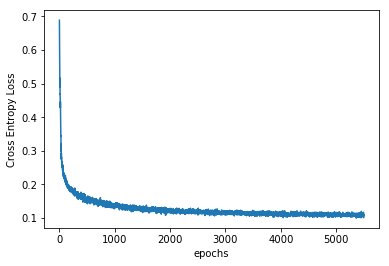

In [7]:
plt.plot(err)
plt.xlabel('epochs')
plt.ylabel('Cross Entropy Loss')

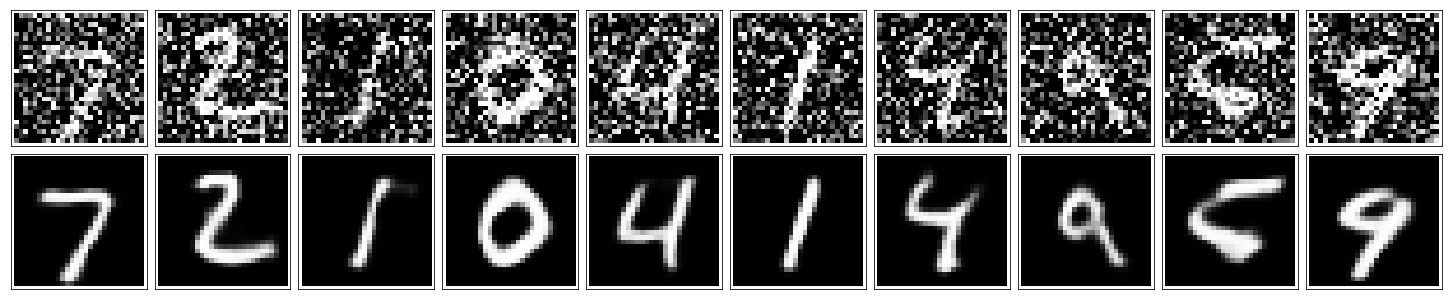

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={X_noisy: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)



In [9]:
sess.close()